In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Tensorflow imports
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [2]:
# Importing data

train_set, test_set = imdb.load_data(num_words=5000)
X_train, y_train = train_set
X_test, y_test = test_set

word_index = imdb.get_word_index()
word_index = {value:key for key, value in word_index.items()}
for i in range(5):
  index = np.random.randint(0, len(y_train))
  print(' '.join(word_index.get(i-3, '#') for i in X_train[index]))
  print('Sentiment:', y_train[index])

1654784/1641221 [==============================] - 0s 0us/step
# grey matter aka the brain machine but the video people thought better of that the screen says 1972 but imdb says # it's that kind of movie the government has some kind of # interest in this # # project that has # four people who turn out to be # a # a # priest a # veteran and a # who got an # to sit in a # room with a computer that can read their horrendous secret thoughts in the end the government takes over the lab by force and everybody dies here is a movie that is incompetent in every important way my s has better production values than this it held my interest though just to see what exactly these exploitation filmmakers thought they were doing # in four guys in a room character drama the answer a # about how science is inferior to god thanks a lot it's like opening a # # and getting your # # # # the priest is played by james # p # best the # by # the # simon # also featuring very very very long # and transition shot

In [4]:
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)
 
def vectorize(X=X, unique = 5000):
  matrix = np.zeros((len(X), unique))
  for i, instance in enumerate(X):
    matrix[i, instance] = 1
  return matrix
 
X = vectorize(X)

X_train = X[:-10000]
y_train = y[:-10000]
X_test = X[-10000:]
y_test = y[-10000:]

X_train.shape

(40000, 5000)

In [5]:
# Dense model
def make_model():
  model = Sequential([
                    # Input Layer
                    Dense(50, activation='relu', input_shape=(5000, )),

                    # Hidden Layers
                    Dropout(rate=0.25),
                    Dense(50, activation='relu'),
                    Dropout(rate=0.25),
                    Dense(50, activation='relu'),

                    # Output Layer
                    Dense(1, activation='sigmoid')
  ])
  return model
temp_model = make_model()
temp_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                250050    
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                2550      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 255,201
Trainable params: 255,201
Non-trainable params: 0
__________________________________________________

In [6]:
adam_model = make_model()
adam_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
score = adam_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 13s 3ms/step - loss: 0.3262 - accuracy: 0.8623 - val_loss: 0.2761 - val_accuracy: 0.8904
Epoch 2/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.2388 - accuracy: 0.9037 - val_loss: 0.2605 - val_accuracy: 0.8957
Epoch 3/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.1889 - accuracy: 0.9270 - val_loss: 0.2801 - val_accuracy: 0.8871
Epoch 4/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.1483 - accuracy: 0.9450 - val_loss: 0.3045 - val_accuracy: 0.8852
Epoch 5/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.1189 - accuracy: 0.9565 - val_loss: 0.3309 - val_accuracy: 0.8823
Epoch 6/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.1021 - accuracy: 0.9617 - val_loss: 0.4182 - val_accuracy: 0.8824
Epoch 7/10
5000/5000 [==============================] - 12s 2ms/step - loss: 0.0827 - accuracy: 0.9684 - val_loss: 0.4667 - val_ac

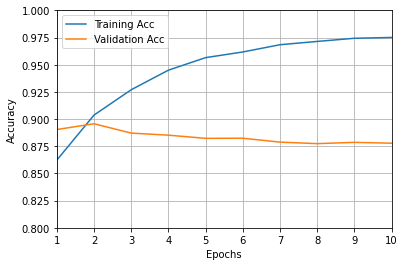

In [7]:
plt.plot(range(1, 11), score.history['accuracy'], label='Training Acc')
plt.plot(range(1, 11), score.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 10, 0.8, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [8]:
rms_model = make_model()
rms_model.compile(optimizer='RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
score = rms_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 18s 3ms/step - loss: 0.3393 - accuracy: 0.8661 - val_loss: 0.2671 - val_accuracy: 0.8968
Epoch 2/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2811 - accuracy: 0.8971 - val_loss: 0.2681 - val_accuracy: 0.8994
Epoch 3/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2742 - accuracy: 0.9034 - val_loss: 0.2634 - val_accuracy: 0.9002
Epoch 4/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2661 - accuracy: 0.9069 - val_loss: 0.2723 - val_accuracy: 0.8967
Epoch 5/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2650 - accuracy: 0.9086 - val_loss: 0.2711 - val_accuracy: 0.8999
Epoch 6/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2597 - accuracy: 0.9093 - val_loss: 0.2762 - val_accuracy: 0.8956
Epoch 7/10
5000/5000 [==============================] - 17s 3ms/step - loss: 0.2643 - accuracy: 0.9110 - val_loss: 0.2611 - val_ac

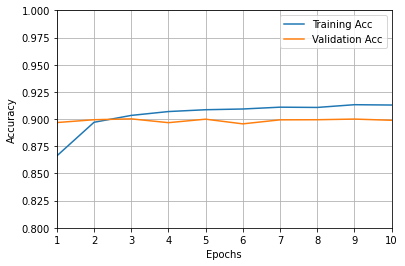

In [9]:
plt.plot(range(1, 11), score.history['accuracy'], label='Training Acc')
plt.plot(range(1, 11), score.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 10, 0.8, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

In [10]:
sgd_model = make_model()
sgd_model.compile(optimizer='SGD', loss='binary_crossentropy', metrics=['accuracy'])
score = sgd_model.fit(X_train, y_train, epochs=10, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4251 - accuracy: 0.8013 - val_loss: 0.2964 - val_accuracy: 0.8782
Epoch 2/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.2955 - accuracy: 0.8795 - val_loss: 0.2726 - val_accuracy: 0.8881
Epoch 3/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.2585 - accuracy: 0.8957 - val_loss: 0.2738 - val_accuracy: 0.8859
Epoch 4/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.2321 - accuracy: 0.9075 - val_loss: 0.2701 - val_accuracy: 0.8890
Epoch 5/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.2104 - accuracy: 0.9156 - val_loss: 0.2806 - val_accuracy: 0.8845
Epoch 6/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.1903 - accuracy: 0.9269 - val_loss: 0.2792 - val_accuracy: 0.8880
Epoch 7/10
5000/5000 [==============================] - 11s 2ms/step - loss: 0.1688 - accuracy: 0.9359 - val_loss: 0.2948 - val_ac

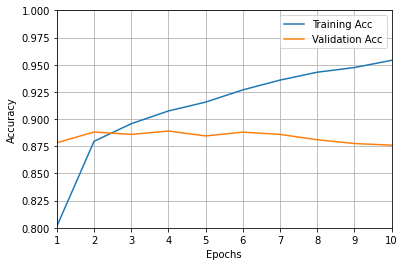

In [11]:
plt.plot(range(1, 11), score.history['accuracy'], label='Training Acc')
plt.plot(range(1, 11), score.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 10, 0.8, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

## Recurrent Neural Network (LSTM)

In [12]:
# Importing dataset
train_set, test_set = imdb.load_data(num_words=10000)
X_train, y_train = train_set
X_test, y_test = test_set

# Padding the input data to same length
X = np.concatenate((X_train, X_test), axis=0)
y = np.concatenate((y_train, y_test), axis=0)

X = sequence.pad_sequences(X, maxlen = 100)

X_train = X[:-10000]
y_train = y[:-10000]
X_test = X[-10000:]
y_test = y[-10000:]

In [13]:
def make_model():
  model = Sequential([
                Embedding(input_dim=10000, output_dim=128),
                LSTM(128),
                Dense(1, activation='sigmoid')
  ])
  return model
temp_model = make_model()
temp_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 128)         1280000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 1,411,713
Trainable params: 1,411,713
Non-trainable params: 0
_________________________________________________________________


In [14]:
adam_model = make_model()
adam_model.compile('adam', loss='binary_crossentropy', metrics=['accuracy'])
adam_scores = adam_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 160s 126ms/step - loss: 0.3895 - accuracy: 0.8248 - val_loss: 0.3195 - val_accuracy: 0.8588
Epoch 2/5
1250/1250 [==============================] - 158s 127ms/step - loss: 0.2626 - accuracy: 0.8945 - val_loss: 0.3002 - val_accuracy: 0.8723
Epoch 3/5
1250/1250 [==============================] - 158s 126ms/step - loss: 0.1949 - accuracy: 0.9250 - val_loss: 0.3382 - val_accuracy: 0.8667
Epoch 4/5
1250/1250 [==============================] - 159s 127ms/step - loss: 0.1449 - accuracy: 0.9469 - val_loss: 0.3648 - val_accuracy: 0.8692
Epoch 5/5
1250/1250 [==============================] - 158s 127ms/step - loss: 0.1067 - accuracy: 0.9615 - val_loss: 0.4029 - val_accuracy: 0.8655


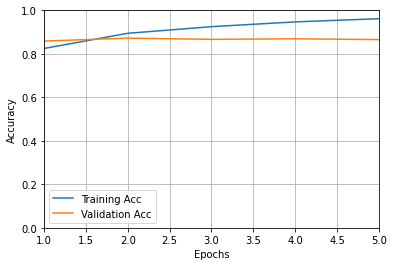

In [15]:
plt.plot(range(1, 6), adam_scores.history['accuracy'], label='Training Acc')
plt.plot(range(1, 6), adam_scores.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 5, 0, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); plt.grid(); plt.show()

In [16]:
sgd_model = make_model()
sgd_model.compile('SGD', loss='binary_crossentropy', metrics=['accuracy'])
sgd_scores = sgd_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 145s 115ms/step - loss: 0.6930 - accuracy: 0.5060 - val_loss: 0.6927 - val_accuracy: 0.5112
Epoch 2/5
1250/1250 [==============================] - 143s 115ms/step - loss: 0.6925 - accuracy: 0.5199 - val_loss: 0.6922 - val_accuracy: 0.5581
Epoch 3/5
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6921 - accuracy: 0.5364 - val_loss: 0.6917 - val_accuracy: 0.5692
Epoch 4/5
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6915 - accuracy: 0.5480 - val_loss: 0.6911 - val_accuracy: 0.5827
Epoch 5/5
1250/1250 [==============================] - 144s 115ms/step - loss: 0.6908 - accuracy: 0.5570 - val_loss: 0.6904 - val_accuracy: 0.5493


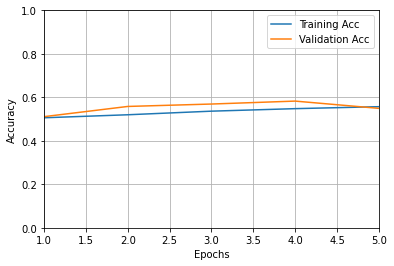

In [17]:
plt.plot(range(1, 6), sgd_scores.history['accuracy'], label='Training Acc')
plt.plot(range(1, 6), sgd_scores.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 5, 0, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); plt.grid(); plt.show()

In [18]:
rms_model = make_model()
rms_model.compile('RMSprop', loss='binary_crossentropy', metrics=['accuracy'])
rms_scores = rms_model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
1250/1250 [==============================] - 152s 120ms/step - loss: 0.3992 - accuracy: 0.8229 - val_loss: 0.3247 - val_accuracy: 0.8639
Epoch 2/5
1250/1250 [==============================] - 150s 120ms/step - loss: 0.2876 - accuracy: 0.8822 - val_loss: 0.2883 - val_accuracy: 0.8773
Epoch 3/5
1250/1250 [==============================] - 150s 120ms/step - loss: 0.2472 - accuracy: 0.9009 - val_loss: 0.2750 - val_accuracy: 0.8823
Epoch 4/5
1250/1250 [==============================] - 150s 120ms/step - loss: 0.2168 - accuracy: 0.9146 - val_loss: 0.2797 - val_accuracy: 0.8841
Epoch 5/5
1250/1250 [==============================] - 151s 120ms/step - loss: 0.1932 - accuracy: 0.9258 - val_loss: 0.2852 - val_accuracy: 0.8799


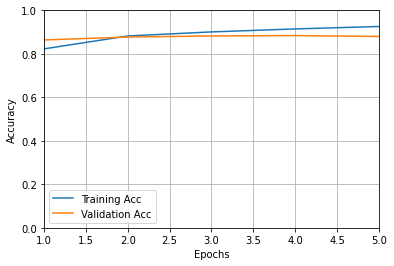

In [19]:
plt.plot(range(1, 6), rms_scores.history['accuracy'], label='Training Acc')
plt.plot(range(1, 6), rms_scores.history['val_accuracy'], label='Validation Acc')
plt.axis([1, 5, 0, 1])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(); plt.grid(); plt.show()

In [20]:
y_pred = rms_model.predict(X_test)
y_pred = y_pred.round().reshape(len(y_pred))

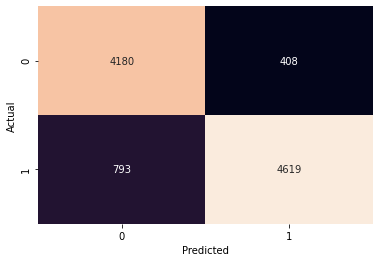

In [21]:
conf_rms = confusion_matrix(y_pred, y_test)
sns.heatmap(conf_rms, annot=True, cbar=False, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
# False negatives
for _ in range(3):
  false_neg = X_test[np.logical_and(y_pred==0, y_test==1)]
  index = np.random.randint(0, len(false_neg))
  print(' '.join(word_index.get(i-3, '#') for i in false_neg[index]))

print()

# false positive
for _ in range(3):
  false_pos = X_test[np.logical_and(y_pred==1, y_test==0)]
  index = np.random.randint(0, len(false_pos))
  print(' '.join(word_index.get(i-3, '#') for i in false_pos[index]))

marketing plan to destroy anything that looks remotely original and promising br br conclusion you have a show with good special effects stuff like huge monsters killing people or destroying # then going into genetic # # people human # end of the world also the only # are scenes with aggressive # or other annoying people being killed for their stupidity the down side is that after 15 episodes that prepare something huge the show ends no real ending no closure just a bitter taste of cloth in one's mouth as if you just # a piece of suit
show is how original it is and the fact that it has people the # who love doing what they do and who would # this show has loads of bits in it that can crack up anybody like the ad road test which i've already mentioned mr ten questions where he asks 10 questions really fast in front of famous celebrities like hugh jackman and the beach boys temporary ones like the # # and ones that have been there from the start like what have we # from current affairs t